In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#Import data
income_data = pd.read_csv('income_data_df_eda.csv')

In [3]:
#Checking for missing values
income_data.isnull().sum()

Age               0
Workclass         0
Final_Weight      0
Education         0
Education_Num     0
Marital_Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [4]:
income_data.nunique()

Age                  73
Workclass             9
Final_Weight      21648
Education            16
Education_Num        16
Marital_Status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [5]:
income_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       32561 non-null  object
 2   Final_Weight    32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education_Num   32561 non-null  int64 
 5   Marital_Status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital_gain    32561 non-null  int64 
 11  Capital_loss    32561 non-null  int64 
 12  Hours_per_week  32561 non-null  int64 
 13  Native_country  32561 non-null  object
 14  Income          32561 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


In [6]:
# Encoding columns for object 
var = ['Workclass', 'Education', 'Marital_Status', 'Occupation','Relationship','Race','Sex','Native_country']
for i in var:
    income_data[i] = income_data[i].astype('|S')
    income_data[i] = label_encoder.fit_transform(income_data[i])
income_data # getting final encoded dataframe

,Age,Workclass,Final_Weight,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,90,0,77053,11,9,6,0,1,4,0,0,4356,40,39,0
1,82,4,132870,11,9,6,4,1,4,0,0,4356,18,39,0
2,66,0,186061,15,10,6,0,4,2,0,0,4356,40,39,0
3,54,4,140359,5,4,0,7,4,4,0,0,3900,40,39,0
4,41,4,264663,15,10,5,10,3,4,0,0,3900,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,4,310152,15,10,4,11,1,4,1,0,0,40,39,0
32557,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32558,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32559,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0


In [7]:
income_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             32561 non-null  int64
 1   Workclass       32561 non-null  int32
 2   Final_Weight    32561 non-null  int64
 3   Education       32561 non-null  int32
 4   Education_Num   32561 non-null  int64
 5   Marital_Status  32561 non-null  int32
 6   Occupation      32561 non-null  int32
 7   Relationship    32561 non-null  int32
 8   Race            32561 non-null  int32
 9   Sex             32561 non-null  int32
 10  Capital_gain    32561 non-null  int64
 11  Capital_loss    32561 non-null  int64
 12  Hours_per_week  32561 non-null  int64
 13  Native_country  32561 non-null  int32
 14  Income          32561 non-null  int64
dtypes: int32(8), int64(7)
memory usage: 2.7 MB


In [8]:
#Checking for Multicolinearity
variables = income_data[['Age', 'Workclass', 'Final_Weight', 'Education', 'Education_Num',
       'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns

vif

,VIF,Features
0,8.521265,Age
1,8.475260,Workclass
2,4.031573,Final_Weight
3,9.210325,Education
4,18.379729,Education_Num
5,3.976179,Marital_Status
6,3.710596,Occupation
7,2.612286,Relationship
8,17.578379,Race
9,4.441675,Sex


Features with VIF greater than 10 will be dropped

In [9]:
# now, we'll drop columns which have vif>10
income_data = income_data.drop(['Education_Num','Race','Hours_per_week','Native_country'], axis=1)
income_data.head()

,Age,Workclass,Final_Weight,Education,Marital_Status,Occupation,Relationship,Sex,Capital_gain,Capital_loss,Income
0,90,0,77053,11,6,0,1,0,0,4356,0
1,82,4,132870,11,6,4,1,0,0,4356,0
2,66,0,186061,15,6,0,4,0,0,4356,0
3,54,4,140359,5,0,7,4,0,0,3900,0
4,41,4,264663,15,5,10,3,0,0,3900,0


In [10]:
#Checking and removing outliers
income_data = income_data[(np.abs(stats.zscore(income_data)) < 3).all(axis=1)]
income_data

,Age,Workclass,Final_Weight,Education,Marital_Status,Occupation,Relationship,Sex,Capital_gain,Capital_loss,Income
1470,62,2,159908,9,2,1,5,0,0,1258,0
1471,72,2,144515,10,2,4,0,1,0,1258,0
1472,76,0,224680,14,2,0,0,1,0,1258,0
1473,66,4,350498,15,2,14,0,1,0,1258,0
1474,33,2,262042,11,0,1,3,0,0,1138,0
...,...,...,...,...,...,...,...,...,...,...,...
32556,22,4,310152,15,4,11,1,1,0,0,0
32557,27,4,257302,7,2,13,5,0,0,0,0
32558,40,4,154374,11,2,7,0,1,0,0,1
32559,58,4,151910,11,6,1,4,0,0,0,0


In [11]:
income_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30428 entries, 1470 to 32560
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             30428 non-null  int64
 1   Workclass       30428 non-null  int32
 2   Final_Weight    30428 non-null  int64
 3   Education       30428 non-null  int32
 4   Marital_Status  30428 non-null  int32
 5   Occupation      30428 non-null  int32
 6   Relationship    30428 non-null  int32
 7   Sex             30428 non-null  int32
 8   Capital_gain    30428 non-null  int64
 9   Capital_loss    30428 non-null  int64
 10  Income          30428 non-null  int64
dtypes: int32(6), int64(5)
memory usage: 2.1 MB


In [12]:
income_data.head()

,Age,Workclass,Final_Weight,Education,Marital_Status,Occupation,Relationship,Sex,Capital_gain,Capital_loss,Income
1470,62,2,159908,9,2,1,5,0,0,1258,0
1471,72,2,144515,10,2,4,0,1,0,1258,0
1472,76,0,224680,14,2,0,0,1,0,1258,0
1473,66,4,350498,15,2,14,0,1,0,1258,0
1474,33,2,262042,11,0,1,3,0,0,1138,0


In [13]:
#standardization the numeric features
from sklearn.preprocessing import StandardScaler
income_data[['Age', 'Final_Weight','Capital_gain','Capital_loss']] = StandardScaler().fit_transform(income_data[['Age', 'Final_Weight','Capital_gain','Capital_loss']])

In [14]:
# Split the data into X & y

data = income_data.values
X,y = data[:,:-1], data[:,-1]

In [15]:
print(X.shape)
print(y.shape)


(30428, 10)
(30428,)


In [16]:
# Hold-out validation

# first one
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=15)

# Second one
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size = 0.9, test_size=0.1, random_state=15)

print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)

print(y_train.shape)
print(y_test.shape)
print(y_valid.shape)


(21907, 10)
(6086, 10)
(2435, 10)
(21907,)
(6086,)
(2435,)


# 1. LOGISTIC REGRESSION

In [17]:
# Training my model

log_reg = LogisticRegression(random_state=10, solver = 'lbfgs')

log_reg.fit(X_train, y_train)

LogisticRegression(random_state=10)

In [18]:
# Making Prediction
log_reg.predict(X_train)
y_pred = log_reg.predict(X_train)

# predict_proba - Probability estimates
pred_prob = log_reg.predict_proba(X_train)


### Model Evaluation

In [19]:
# Accuracy on Train
print("The Training Accuracy is: ", log_reg.score(X_train, y_train))

# Accuracy on Test
print("The Testing Accuracy is: ", log_reg.score(X_test, y_test))


# Classification Report
print(classification_report(y_train, y_pred))



The Training Accuracy is:  0.801478979321678
The Testing Accuracy is:  0.8064410121590536
              precision    recall  f1-score   support

         0.0       0.81      0.97      0.88     17004
         1.0       0.68      0.21      0.32      4903

    accuracy                           0.80     21907
   macro avg       0.75      0.59      0.60     21907
weighted avg       0.78      0.80      0.76     21907



In [20]:
# Confusion Matrix function

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm,  xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

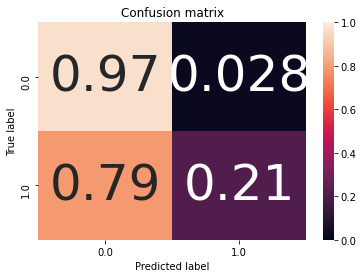

In [21]:
# Visualizing confusion matrix

conf_mat = confusion_matrix(y_train, y_pred)
cm_norm = conf_mat / conf_mat.sum(axis=1).reshape(-1,1)
plot_confusion_matrix(cm_norm, classes = log_reg.classes_, title='Confusion matrix')

###  Hyper Parameter Tuning

In [22]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold
kf = KFold(n_splits=3, random_state=0, shuffle=True)
C_List = np.geomspace(1e-5, 1e5, num=20)

# Logistic Reg CV
Log_reg3 = LogisticRegressionCV(cv=kf, random_state=15, Cs = C_List, solver ='lbfgs')
Log_reg3.fit(X_train, y_train)
print("The CA is:", Log_reg3.score(X_test, y_test))
pred_proba_t = Log_reg3.predict_proba(X_test)
log_loss3 = log_loss(y_test, pred_proba_t)
print("The Logistic Loss is: ", log_loss3)

print("The optimal C parameter is: ", Log_reg3.C_)

The CA is: 0.8113703581991456
The Logistic Loss is:  0.4231365232837727
The optimal C parameter is:  [0.00127427]


### Final Logistic Regression Model

In [23]:
# Final Model 

log_reg3 = LogisticRegression(random_state=10, solver = 'lbfgs', C=0.00127427)
log_reg3.fit(X_train, y_train)
score = log_reg3.score(X_valid, y_valid)

pred_proba_t = log_reg3.predict_proba(X_valid)
log_loss2 = log_loss(y_valid, pred_proba_t)

print("Testing Acc:", score)
print("Log Loss:", log_loss2)

Testing Acc: 0.8213552361396304
Log Loss: 0.42285269808975207


# 2. KNN

Choosing K value

In [24]:
test_scores = []
train_scores = []
k=[]
for i in range(1,40):
    
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    k.append(i)
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))


In [25]:
# zip
outcomes = zip(k, train_scores, test_scores)

#df
df_outcomes = pd.DataFrame(outcomes, columns = ["k", 'train_scores','test_scores'])

#print
df_outcomes

# Ordering the data (sort_values)
df_outcomes.sort_values("test_scores", ascending = True).reset_index()

,index,k,train_scores,test_scores
0,0,1,0.999817,0.809563
1,1,2,0.900078,0.830102
2,2,3,0.901584,0.831745
3,3,4,0.882366,0.841604
4,4,5,0.882686,0.841932
5,6,7,0.873967,0.844726
6,14,15,0.863788,0.846040
7,12,13,0.864746,0.846697
8,5,6,0.875108,0.846862
9,18,19,0.860364,0.847355


It can be observed that k=36 has the highest score for the testing data

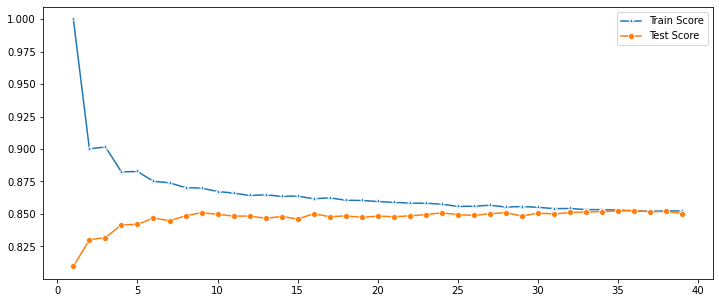

In [26]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,40),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,40),test_scores,marker='o',label='Test Score')

### Fit and scoring the model base on k=36

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=36)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=36)

In [28]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
pl = confusion_matrix(y_test,y_pred)

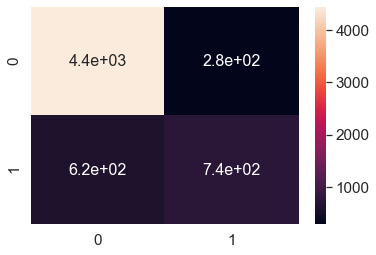

In [29]:
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(pl, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [30]:
# NOW WITH K=36
knn = KNeighborsClassifier(n_neighbors=36)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=36')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=36


[[4444  282]
 [ 615  745]]


              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91      4726
         1.0       0.73      0.55      0.62      1360

    accuracy                           0.85      6086
   macro avg       0.80      0.74      0.77      6086
weighted avg       0.84      0.85      0.84      6086

